## There are 3 types of classification problems
- Binary Classification
- Multifunction Classication
- Multilabel Classification

# Creating data to view and fit


In [40]:
from sklearn.datasets import make_circles

# Make 1000 observations
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [41]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [42]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [43]:
# Visualize the data for better understanding
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


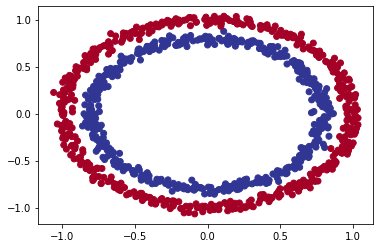

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [45]:
# Checking the shape of features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [46]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed = 42

# Create the model using an API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 0s 666us/step - loss: 3.9595 - accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 765us/step - loss: 1.0510 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 677us/step - loss: 0.7224 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 840us/step - loss: 0.7029 - accuracy: 0.5050
Epoch 5/5
32/32 [==============================] - 0s 776us/step - loss: 0.6972 - accuracy: 0.4990


In [47]:
# Improve the model 48% accuracy is too long.
# Train the model for longer
# NOTE: we are evaluating using the same data 
# This is just an example
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 712us/step - loss: 0.6932 - accuracy: 0.5000


[0.6932229399681091, 0.5]

In [48]:
# Improve the model by adding an extra layer

# Set the seed
tf.random.set_seed = 42

# Create the model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [49]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 679us/step - loss: 0.6934 - accuracy: 0.5000


[0.6934021711349487, 0.5]

Improve the model by:
- Create a model - Add more layers or increase the nuber of hidden units within a layer
- Compile the model - use a diffeerent optimization
- Fit the data - Fit the model for more epochs

In [50]:
# Improve the model by adding an activation

# Set the seed
tf.random.set_seed = 42

# Create the model with 2 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # added 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [51]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 581us/step - loss: 0.6934 - accuracy: 0.4820


[0.6934396028518677, 0.4819999933242798]

In [52]:
# Visualizae the model predictions with a function
import numpy as np
def plot_boundary(model, X, y):
    """
    Takes in a trained model, Features(X) and Label(Y)
    Create a meshgrid of the different X values
    Make predictions across the meshgrid
    Plot the predictions as well as a line between zones
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
    np.linspace(y_min, y_max, 100))

    # Create X value (predictions using these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Flatten 2D arrays

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Utilizing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Performing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Performing binary classification


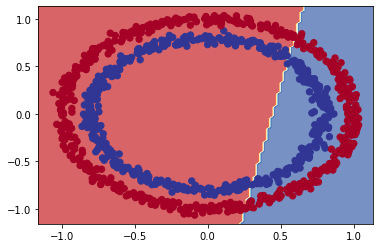

In [53]:
# It is clear that the prediction is linear
# Hence non-linearity (activation) is needed
plot_boundary(model=model_3, X=X, y=y)

In [54]:
# Adding non-linearity

# Set the seed
tf.random.set_seed = 42

# Create the model 
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model 
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 789us/step - loss: 5.9368 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 905us/step - loss: 5.7257 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 731us/step - loss: 4.8880 - accuracy: 0.4620
Epoch 4/100
32/32 [==============================] - 0s 936us/step - loss: 4.7036 - accuracy: 0.4570
Epoch 5/100
32/32 [==============================] - 0s 994us/step - loss: 4.4738 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 832us/step - loss: 4.3983 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 818us/step - loss: 4.1886 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 761us/step - loss: 3.8932 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 805us/step - loss: 3.1519 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 882us/step - loss: 0.9527 - accura

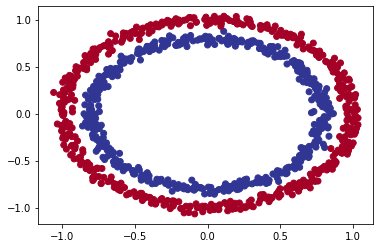

In [55]:
# Check out the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Performing binary classification


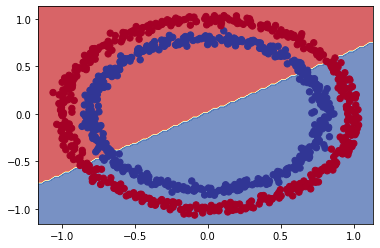

In [56]:
# Check the decision boundary for our latest model
plot_boundary(model=model_4, X=X, y=y)

In [57]:
# As expected it still didn't do well since the activation
# Was still linear

# Set the seed
tf.random.set_seed = 42

# Create the model 
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model 
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 831us/step - loss: 6.3748 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 945us/step - loss: 6.3690 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3683 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 956us/step - loss: 6.3675 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3668 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 796us/step - loss: 6.3660 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3653 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 801us/step - loss: 6.3644 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3637 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 722us/step - loss: 6.3631 - accuracy: 0.48

In [58]:
# Keep the relu activation and add more neurons

# Set the seed
tf.random.set_seed = 42

# Create the model 
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile the model 
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 795us/step - loss: 1.6081 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1694 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 891us/step - loss: 1.0854 - accuracy: 0.4590
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0318 - accuracy: 0.4300
Epoch 5/100
32/32 [==============================] - 0s 817us/step - loss: 0.9922 - accuracy: 0.4140
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9596 - accuracy: 0.4270
Epoch 7/100
32/32 [==============================] - 0s 816us/step - loss: 0.9307 - accuracy: 0.4440
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9064 - accuracy: 0.4490
Epoch 9/100
32/32 [==============================] - 0s 883us/step - loss: 0.8844 - accuracy: 0.4410
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8656 - accuracy: 0.4440

Performing binary classification


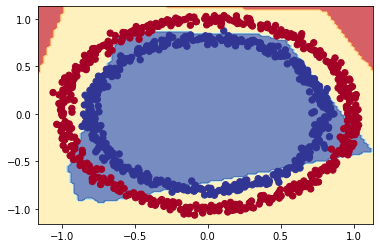

In [59]:
# Visualize the model 
plot_boundary(model_6, X, y)

In [60]:
# Set the seed
tf.random.set_seed = 42

# Create the model 
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model 
model_7.compile(loss="binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 836us/step - loss: 0.7762 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7460 - accuracy: 0.4890
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7294 - accuracy: 0.4720
Epoch 4/250
32/32 [==============================] - 0s 797us/step - loss: 0.7207 - accuracy: 0.4270
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7153 - accuracy: 0.3650
Epoch 6/250
32/32 [==============================] - 0s 890us/step - loss: 0.7122 - accuracy: 0.4030
Epoch 7/250
32/32 [==============================] - 0s 861us/step - loss: 0.7100 - accuracy: 0.4580
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7080 - accuracy: 0.4720
Epoch 9/250
32/32 [==============================] - 0s 827us/step - loss: 0.7065 - accuracy: 0.4680
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7050 - accuracy: 0.4590

32/32 [==============================] - 0s 613us/step - loss: 0.0261 - accuracy: 0.9990
Performing binary classification


([0.026069708168506622, 0.9990000128746033], None)

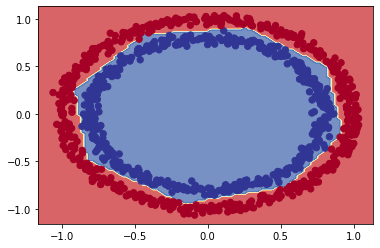

In [61]:
# Evaluate and visualize
# Introducing non-linearity and a sigmoid/softmax output
# Gave a good distinction
model_7.evaluate(X,y), plot_boundary(model_7,X,y)

## Evaluating and improving our classification

In [62]:
len(X)

1000

In [63]:
# Change the learning rate and lower the epochs
# The test data is added in the model fitting

# Set the seed
tf.random.set_seed = 42

# Create the model 
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model 
model_8.compile(loss="binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=["accuracy"])

# Fit the model
history = model_8.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6777 - val_accuracy: 0.5750
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5200 - val_loss: 0.6717 - val_accuracy: 0.6300
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5562 - val_loss: 0.6686 - val_accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6187 - val_loss: 0.6549 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.6237 - val_loss: 0.6392 - val_accuracy: 0.7050
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6762 - val_loss: 0.6167 - val_accuracy: 0.7900
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7675 - val_loss: 0.6084 - val_accuracy: 0.6950
Epoch 8/100
2

Performing binary classification


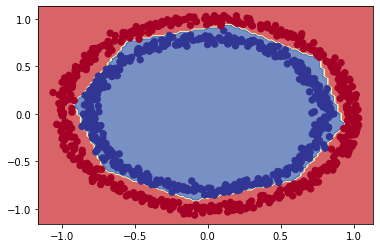

In [64]:
# Plot the decision boundaries
plot_boundary(model=model_8, X=X, y=y)

## Plot the loss (or training) Curves

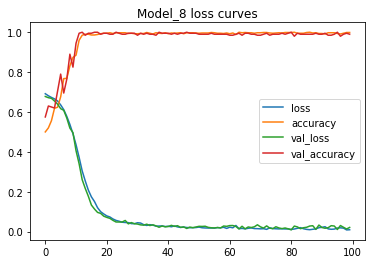

In [65]:
# NOTE: The loss function going down typically means
# that the model is improving (Good when comparing
# multiple models to see, which drops faster/further etc.)

pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

## Finding the best learning Rate
- A Learning rate **callback**
- Another model (You could modify the previous one though)
- A modified loss curves plot

In [66]:
# Set the seed
tf.random.set_seed = 42

# Create the model 
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model 
model_9.compile(loss="binary_crossentropy",
optimizer = "Adam",
metrics=["accuracy"])

# Creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X, y, epochs=100, validation_split=0.2,
callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.6925 - accuracy: 0.4975 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6954 - val_accuracy: 0.5050
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4875 - val_loss: 0.6954 - val_accuracy: 0.4400
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4938 - val_loss: 0.6954 - val_accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5188 - val_loss: 0.6954 - val_accuracy: 0.4500
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5113 - val_loss: 0.6954 - val_accuracy: 0.4450
Epoch 8/100
2

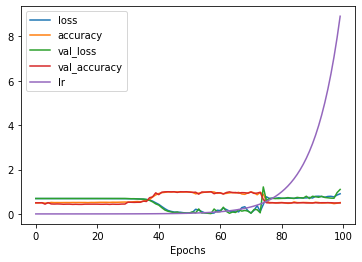

In [67]:
# Check the history
pd.DataFrame(history_9.history).plot(xlabel="Epochs");

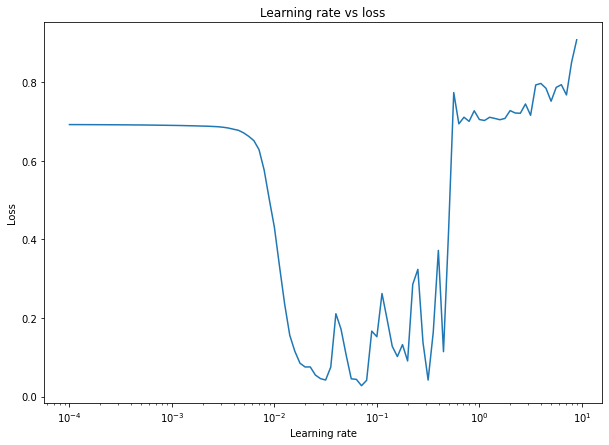

In [68]:
# Plot the learning rate vs loss
# Notice that the ideal rate is between the lowest pt and 10* before it
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss");

**Hence, the ideal learning rate is between the lowest point and 10x backwards**

In [69]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [70]:
# Set the seed
tf.random.set_seed = 42

# Create the model 
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model using the ideal learning rate found above
model_10.compile(loss="binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 834us/step - loss: 0.6930 - accuracy: 0.4913
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5075
Epoch 3/20
25/25 [==============================] - 0s 917us/step - loss: 0.6803 - accuracy: 0.5525
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.6125
Epoch 5/20
25/25 [==============================] - 0s 833us/step - loss: 0.6463 - accuracy: 0.5962
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.6550
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5995 - accuracy: 0.6850
Epoch 8/20
25/25 [==============================] - 0s 875us/step - loss: 0.5614 - accuracy: 0.7237
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.7538
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.8163
Epoch 11/20

In [71]:
# Evaluate model_10 on the test dataset
# Model 10 had 80 less epochs and yet perdformed as good.
# The loss however is lower in model 8.
model_10.evaluate(X_test, y_test),model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 833us/step - loss: 0.0209 - accuracy: 0.9900


([0.05668863654136658, 1.0], [0.020923728123307228, 0.9900000095367432])

Performing binary classification
Performing binary classification


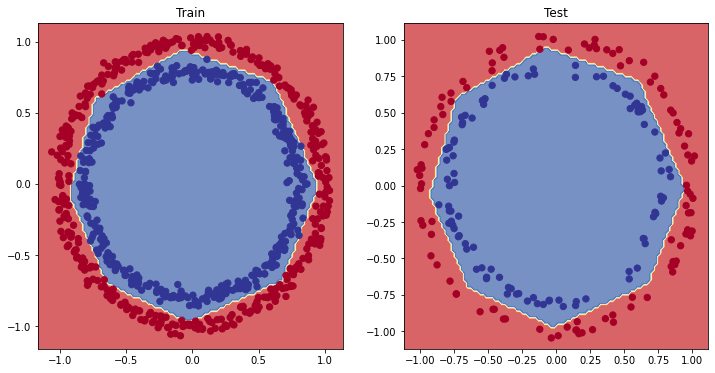

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_boundary(model_10, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_boundary(model_10, X_test, y_test)

Along side visualizing the model results. There are other important classification evaluation metrics.
- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix
- Classification report (from scikit-learn)


In [73]:
# Check the accuracy of model_10
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 499us/step - loss: 0.0567 - accuracy: 1.0000
Model loss on the test set: 0.05668863654136658
Model accuracy on the test set: 100.00%


In [74]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [75]:
# preds is not binary like the test data!!
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64),
 array([[0.9342597 ],
        [0.95647913],
        [0.95647913],
        [0.95647913],
        [0.07494342],
        [0.00345951],
        [0.95647913],
        [0.00727478],
        [0.9377632 ],
        [0.01045933]], dtype=float32))

In [76]:
# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# It is clear that there is only 1 wrong classification
# as a false positive
confusion_matrix(y_test, tf.math.round(y_preds)) # tf.round also works


array([[101,   0],
       [  0,  99]], dtype=int64)

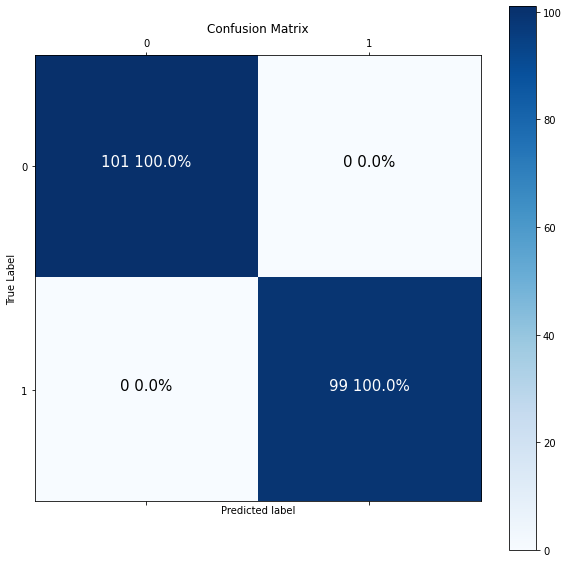

In [77]:
# Create a more visual confusion matrix
import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.math.round(y_preds))
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Plotting it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    label = classes
else: 
    labels = np.arange(cm.shape[0])

# Lebel the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} {(cm_normalized[i, j]*100):.1f}%",
    horizontalalignment="center",
    color="white" if cm[i, j] > threshold else "black",
    size=15)

# Working with a larger example (multiclass classification)

- Two classes = binary classification
- Over two classes = multi-classification

In [104]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is already soreted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [105]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [106]:
# Check the shape of a single occurance
train_data[0].shape, train_labels[0].shape

((28, 28), ())

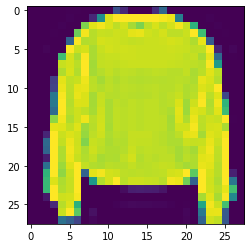

In [107]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [108]:
# Check out samples label
train_labels[7]

2

In [109]:
# Create a small list to index training data label with their 
# actual meanings (found the names from the github repo)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Coat')

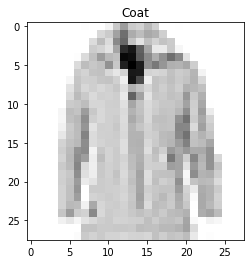

In [110]:
# Plot an example image with its label
index_chosen = 19
plt.imshow(train_data[index_chosen], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_chosen]])

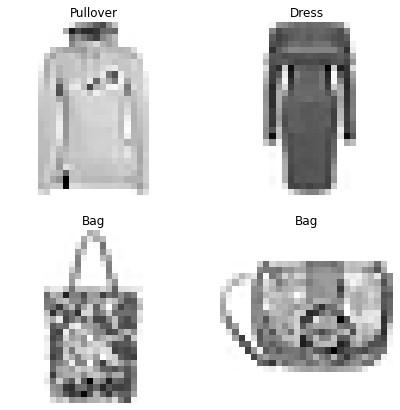

In [111]:
# Plot multiple random images of the data set
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For the multi-class classification model, a similar architecture
to the binary classifier can be implemented, however, some tweaks are:
- Input shape = 28 x 28 (the shape of one image)
- Output shape = 10 (one per class of clothing)
- Loss function = tf.keras.losses.CategoricalCrossentropy()
    - If your labels are one-hot encoded, use CategoricalCrossentropy()
    - If they aren't use SparseCategoricalCrossentropy()
- Output layer activation = Softmax (not sigmoid)

In [113]:
# Set random seed
tf.random.set_seed = 42

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Compile the model
# NOTE: sparse instead of categoricalentropy since it is not one-hot encoded
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3769 - accuracy: 0.0983 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy:

In [114]:
# Same code as above but hot-encoded labels

# Set random seed
tf.random.set_seed = 42

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Compile the model
# NOTE: sparse instead of categoricalentropy since it is not one-hot encoded
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, 
                                tf.one_hot(train_labels, depth=10), 
                                epochs=10,
                                validation_data=(test_data, 
                                tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9976 - accuracy: 0.2055 - val_loss: 1.6780 - val_accuracy: 0.2930
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5942 - accuracy: 0.3094 - val_loss: 1.5496 - val_accuracy: 0.3449
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5064 - accuracy: 0.3422 - val_loss: 1.4725 - val_accuracy: 0.3698
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4360 - accuracy: 0.3862 - val_loss: 1.4171 - val_accuracy: 0.4068
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3903 - accuracy: 0.3997 - val_loss: 1.3821 - val_accuracy: 0.3935
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3642 - accuracy: 0.4041 - val_loss: 1.3614 - val_accuracy: 0.4054
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3490 - accuracy: 0.4060 - val_loss: 1.3638 - val_accuracy:

In [115]:
model_11.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_62 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_63 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [116]:
# Check the min and max values of the traning data
train_data.min(), train_data.max()

(0, 255)

In [117]:
# Divide by the maximum to normalize data (Between 0 and 1)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data 
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [120]:
# Rebuild the model and only change the fitting data to the normalized ones

# Set the seed
tf.random.set_seed = 42

#  Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3824 - accuracy: 0.4745 - val_loss: 1.1668 - val_accuracy: 0.5485
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9655 - accuracy: 0.6328 - val_loss: 0.8416 - val_accuracy: 0.6605
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7761 - accuracy: 0.6798 - val_loss: 0.8015 - val_accuracy: 0.6553
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7328 - accuracy: 0.6961 - val_loss: 0.7504 - val_accuracy: 0.7093
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7078 - accuracy: 0.7248 - val_loss: 0.7299 - val_accuracy: 0.7360
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6760 - accuracy: 0.7564 - val_loss: 0.7109 - val_accuracy: 0.7413
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6469 - accuracy: 0.7664 - val_loss: 0.6660 - val_accuracy:

**NOTE:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

<AxesSubplot:title={'center':'Normalized data'}>

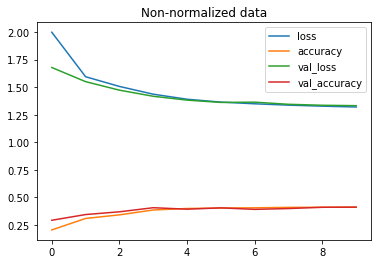

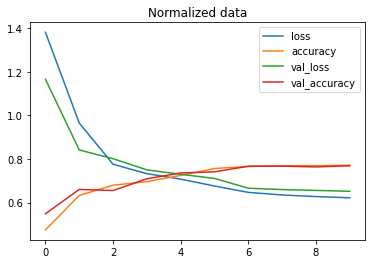

In [123]:
import pandas as pd
# Plot non_normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**NOTE:** The same model with even **slightly** different data can produce dramatically different results. 
So, when comparing models, it is important to make sure they are compared on the same criteria.

## Find the ideal learning rate 

In [125]:
# Set the seed
tf.random.set_seed = 42

#  Create a model (same as model_11)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the model
norm_history = model_13.fit(train_data_norm, train_labels,
                            epochs=40,
                            validation_data=(test_data_norm, test_labels),
                            callbacks=lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4558 - accuracy: 0.4326 - val_loss: 1.0828 - val_accuracy: 0.5734
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9072 - accuracy: 0.6492 - val_loss: 0.7722 - val_accuracy: 0.7034
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7224 - accuracy: 0.7106 - val_loss: 0.7173 - val_accuracy: 0.7136
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6805 - accuracy: 0.7259 - val_loss: 0.7100 - val_accuracy: 0.7239
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6434 - accuracy: 0.7449 - val_loss: 0.6635 - val_accuracy: 0.7301
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6248 - accuracy: 0.7563 - val_loss: 0.6480 - val_accuracy: 0.7577
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6167 - accuracy: 0.7639 - val_loss: 0.6484 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

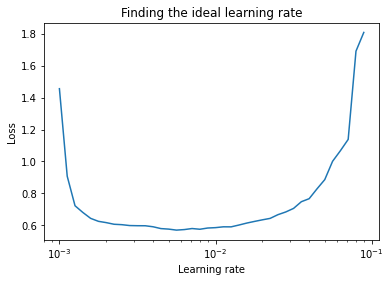

In [127]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, norm_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [129]:
# Build the ideal model with a learning rate of 0.001 
# (which is adam's default). But we will increase the epochs by 10

# Set the random seed
tf.random.set_seed = 42

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm, train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2858 - accuracy: 0.4725 - val_loss: 1.0432 - val_accuracy: 0.6106
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9579 - accuracy: 0.6289 - val_loss: 0.9128 - val_accuracy: 0.6565
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8588 - accuracy: 0.6671 - val_loss: 0.8731 - val_accuracy: 0.6734
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8055 - accuracy: 0.6990 - val_loss: 0.8095 - val_accuracy: 0.7101
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7361 - accuracy: 0.7308 - val_loss: 0.7109 - val_accuracy: 0.7447
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6673 - accuracy: 0.7511 - val_loss: 0.6696 - val_accuracy: 0.7550
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6275 - accuracy: 0.7702 - val_loss: 0.6393 - val_accuracy:

## Evaluating a multi-class classification model

To evaluate multi-class classification models:
- Evaluate its performance using other classification metrics
- Assess some of its predictions (through visualizations)
- Improve its results (by training for longer or changing the archetecture)
- Save and export it for use in an application

The first two methods will be used

In [148]:
# Create a more visual confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.math.round(y_pred))
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Plotting it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else: 
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
    
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({(cm_normalized[i, j]*100):.1f}%)",
        horizontalalignment="center",
        color="white" if cm[i, j] > threshold else "black",
        size=text_size)

In [131]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [139]:
# Make predictions with the model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

array([[1.9797096e-08, 8.7642551e-09, 1.6825315e-07, 5.2005395e-05,
        3.4826460e-08, 3.8811725e-01, 1.7809137e-08, 7.9657428e-02,
        5.3313866e-05, 5.3211975e-01],
       [2.0872189e-03, 2.6965217e-05, 7.9413849e-01, 1.6787022e-02,
        7.3867582e-02, 5.3403353e-05, 1.1302937e-01, 3.4698207e-14,
        9.9287608e-06, 1.9056820e-12],
       [4.6335076e-04, 9.9949372e-01, 2.8105257e-12, 4.2099418e-05,
        8.1067446e-07, 3.2835358e-36, 9.2971192e-08, 0.0000000e+00,
        1.4328060e-16, 6.2599289e-29],
       [1.2141769e-05, 9.9917251e-01, 2.0903767e-12, 8.1473001e-04,
        6.4418276e-07, 3.6784117e-33, 2.7835858e-09, 0.0000000e+00,
        9.4615221e-17, 1.3246372e-24],
       [1.6112810e-01, 8.3895709e-04, 2.8306508e-01, 6.5188490e-02,
        3.9033856e-02, 1.1601757e-05, 4.5019749e-01, 7.3561025e-13,
        5.3637417e-04, 2.1570612e-09]], dtype=float32)

Remember to make the prediction on the same kind of data the model was trained on. If you trained on normalized make predictions on normalized data.

In [140]:
# Convert all of the prediction probabilities into integers
y_predicts = y_probs.argmax(axis=1)
y_predicts[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [141]:
confusion_matrix(y_true=test_labels, y_pred=y_predicts)

array([[812,   8,  14,  50,   2,   4,  98,   0,  12,   0],
       [  6, 935,   5,  42,   4,   1,   6,   0,   1,   0],
       [ 15,   0, 711,  17, 139,   2, 115,   0,   1,   0],
       [ 56,  11,  23, 809,  37,  13,  45,   1,   4,   1],
       [  3,   0, 113,  31, 749,   1, 103,   0,   0,   0],
       [  0,   0,   0,   0,   0, 927,   0,  40,  10,  23],
       [180,   3, 139,  39, 156,   2, 461,   0,  20,   0],
       [  0,   0,   0,   0,   0,  39,   0, 921,   1,  39],
       [  3,   0,   4,   5,   2,  17,  47,   9, 913,   0],
       [  0,   0,   0,   0,   0,  29,   0,  45,   1, 925]], dtype=int64)

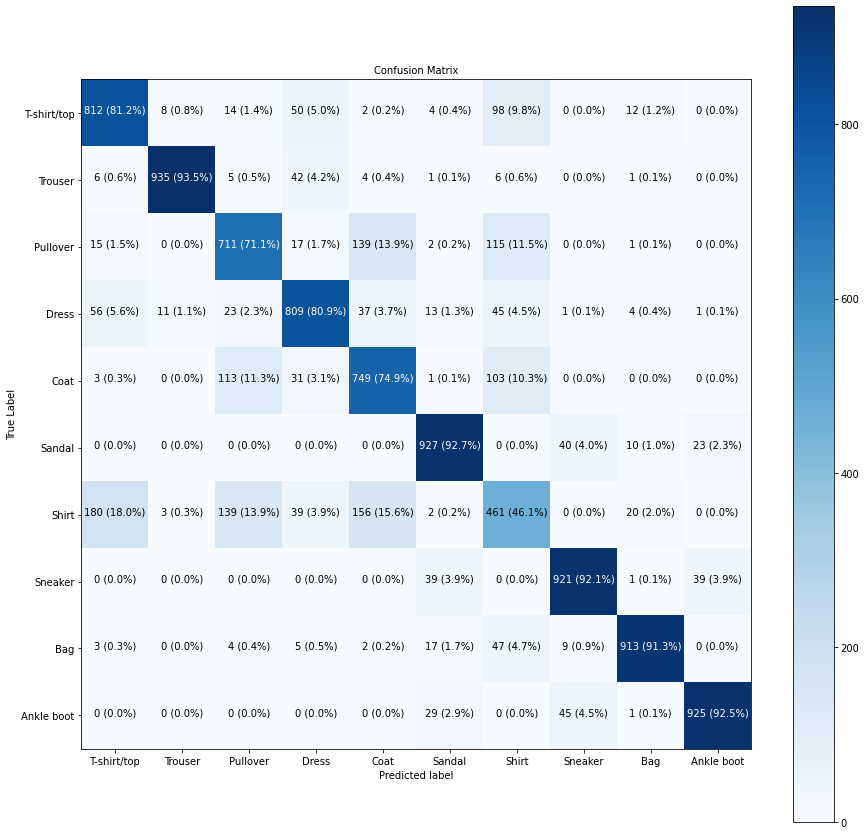

In [149]:
# Make a more understandable matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_predicts, 
classes=class_names, figsize=(15,15), text_size=10)

**NOTE:** Often when working with images and other forms of visual, data, it's a good idea to visualize data to understand the inputs and outputs of the model

In [165]:
import random

def plot_random_iamge(model, images, true_labels, classes):
    """ 
    Picks a random image, plots it and labels it with a prediction and 
    its true label.
    """
    # Set up the random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel(f"Pred:{pred_label} {(tf.reduce_max(pred_probs)*100):2.0f}% (True:{true_label})", color=color)

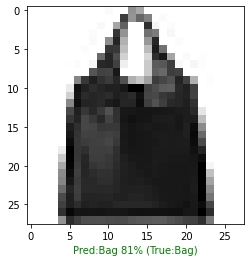

In [184]:
# Check a random image and its prediction
plot_random_iamge(model=model_14, images=test_data_norm, 
                  true_labels=test_labels, classes=class_names)

# What patterns are is the model learning?

In [185]:
model_14.layers

In [186]:
# Extract a particular layer
model_14.layers[1]

In [188]:
# Get the patterns of a layer in the neural network
weights, biases = model_14.layers[1].get_weights()

# Shapes
# 28*28 = 784 
# Hence, for each neuron in the layer has 4 numbers it uses to learn
weights, weights.shape

(array([[-0.62632966, -0.28701285, -0.3605308 ,  0.5422787 ],
        [-1.0194358 , -0.20913206,  0.16211523,  0.6364014 ],
        [-0.9204676 ,  0.4326466 , -0.53221816,  0.9057753 ],
        ...,
        [-0.3600554 , -0.0034155 ,  0.7999038 ,  0.2958812 ],
        [-0.29599318, -0.1921187 ,  0.99178594,  0.00773052],
        [-0.5831089 , -0.11353455,  0.37862253,  0.5179818 ]],
       dtype=float32),
 (784, 4))

In [189]:
model_14.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_74 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_75 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [190]:
# Check the bias vector
biases, biases.shape

(array([-1.2140204, -0.5412843,  1.7662243,  1.1344522], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a tensorflow dense layer)

The bias bector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [201]:
# Check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
